In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Score

In [ ]:
sim_mat = np.load('../data/similarity_metrics/sim_mat.npy' )

In [19]:
sim_mat = sim_mat[:50]

In [20]:
mTOR_library_idx_simi_500_dict = dict()
mTOR_library_score_simi_500_dict = dict()
mTOR_library_idx_high_simi_dict = dict()
mTOR_library_idx_high_simi_score_dict = dict()
max_similarity_value = list()
for i in range(sim_mat.shape[0]):
    high_score_index_list = []
    high_score_list = []
    tmp_mat = sim_mat[i]
    index_list = np.argsort(tmp_mat)[-1-500:]
    score_list = sim_mat[i][index_list]
    mTOR_library_score_simi_500_dict[i] = score_list
#             print(max_index)
    mTOR_library_idx_simi_500_dict[i] = index_list
    for idx in index_list:

            high_score_index_list.append(idx)
            high_score_list.append(sim_mat[i][idx])
    mTOR_library_idx_high_simi_dict[i] = high_score_index_list
    mTOR_library_idx_high_simi_score_dict[i] = high_score_list

/tmp/ipykernel_3940154/3340287609.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_values, labels=labels, patch_artist=True, widths=0.5, showfliers=False)


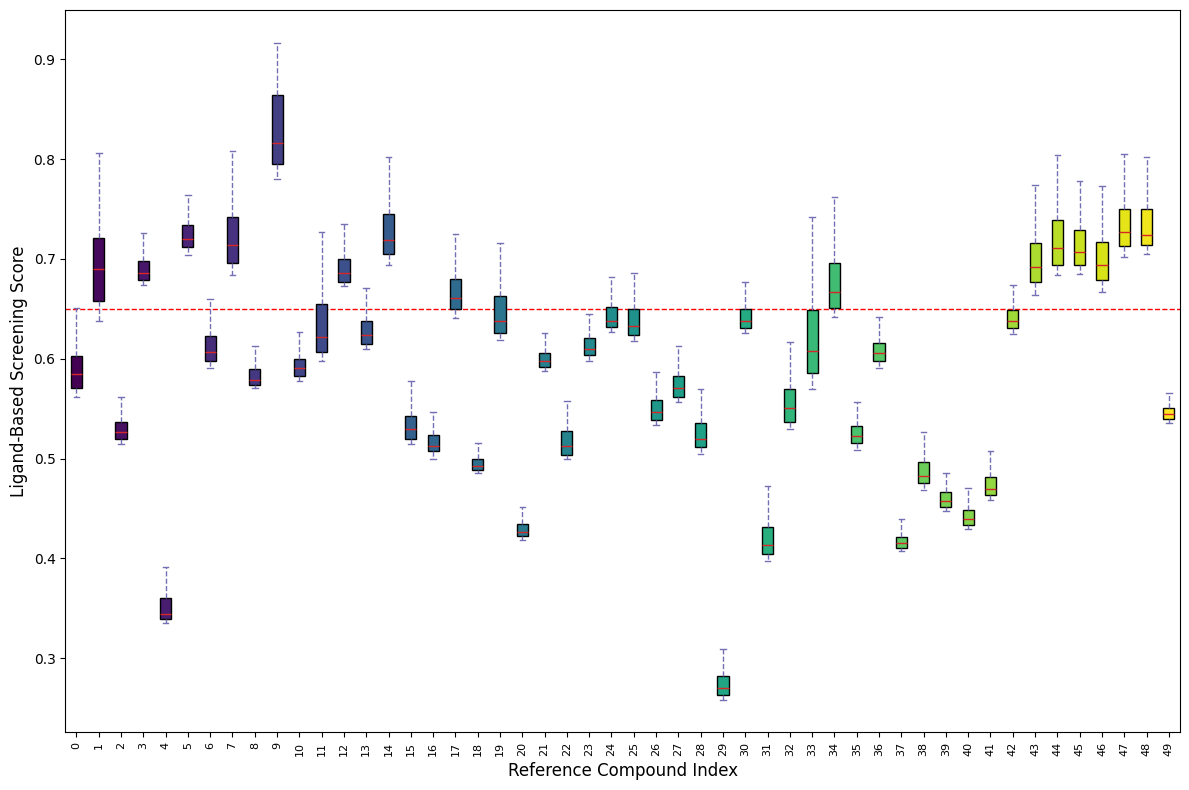

In [21]:
# Filter out empty lists
filtered_data = {k: v for k, v in mTOR_library_idx_high_simi_score_dict.items() if v}

# Extract the data for the box plot
data_values = list(filtered_data.values())
labels = list(filtered_data.keys())

# Create the box plot with 65 keys
plt.figure(figsize=(12, 8))
# Add the threshold line at 0.65
plt.axhline(y=0.65, color='red', linestyle='--', linewidth=1, label='Threshold = 0.65')
box = plt.boxplot(data_values, labels=labels, patch_artist=True, widths=0.5, showfliers=False)



# Apply a color gradient to boxes
colors = plt.cm.viridis(np.linspace(0, 1, len(data_values)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Style and aesthetics
plt.xlabel('Reference Compound Index', fontsize=12)
plt.ylabel('Ligand-Based Screening Score', fontsize=12)
# plt.title('Box Plot of Dictionary Values for 65 Keys', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=8)  # Rotate labels for clarity
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize median, whisker, and cap styles
for median in box['medians']:
    median.set(color='#D62728', linewidth=1)  # Median color
for whisker in box['whiskers']:
    whisker.set(color='#7570b3', linestyle='--', linewidth=1)  # Whisker style
for cap in box['caps']:
    cap.set(color='#7570b3', linewidth=1)  # Cap style

plt.tight_layout()
plt.savefig("plot/compound_library_score_reference_compound.png", dpi=300, format='png')  # High DPI for better resolution
plt.show()

# ADMET 

In [22]:
import pandas as pd

In [ ]:
df = pd.read_csv('../data/processed_data/candidate_library_pred_with_score.csv')

In [24]:
df['ADMET_score'] = df['sum_permibility_property_score'] + df['sum_base_property_score']

In [25]:
admet_score_value_counts = df['ADMET_score'].value_counts()

import matplotlib.pyplot as plt

# Data for ADMET scores and their counts
scores = admet_score_value_counts.keys()

counts = admet_score_value_counts.values

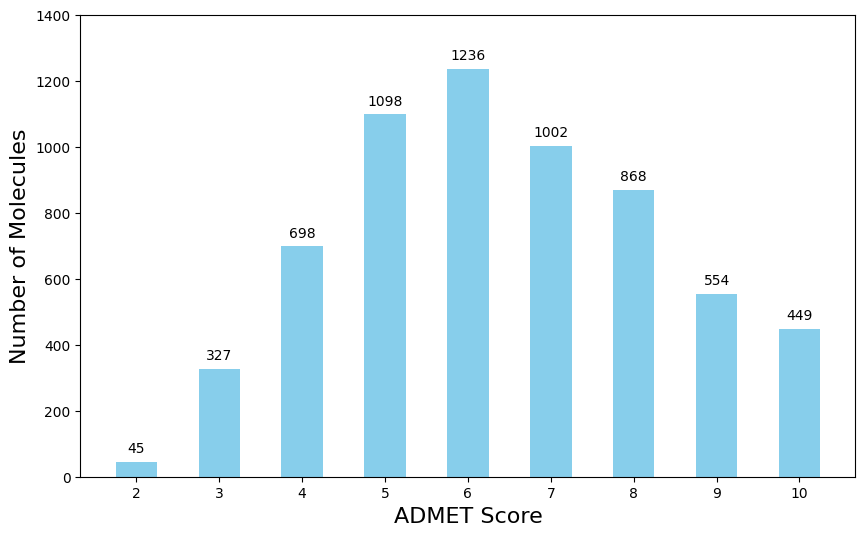

In [26]:
# Create a bar plot with values on top
plt.figure(figsize=(10, 6))
bars = plt.bar(scores, counts, color='skyblue',width=0.5)

# Add numbers on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 20,
             str(bar.get_height()), ha='center', va='bottom')

plt.ylim(0, 1400)

plt.xlabel('ADMET Score', fontsize=16)
plt.ylabel('Number of Molecules', fontsize=16)
# plt.title('Distribution of ADMET Scores')
plt.xticks(scores)  # Ensure all scores are labeled
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.savefig("plot/admet_score.pdf", format='pdf')
plt.show()


In [27]:
tmp_value_counts = df['sum_base_property_score'].value_counts()

# Data for ADMET scores and their counts
scores = tmp_value_counts.keys()

counts = tmp_value_counts.values

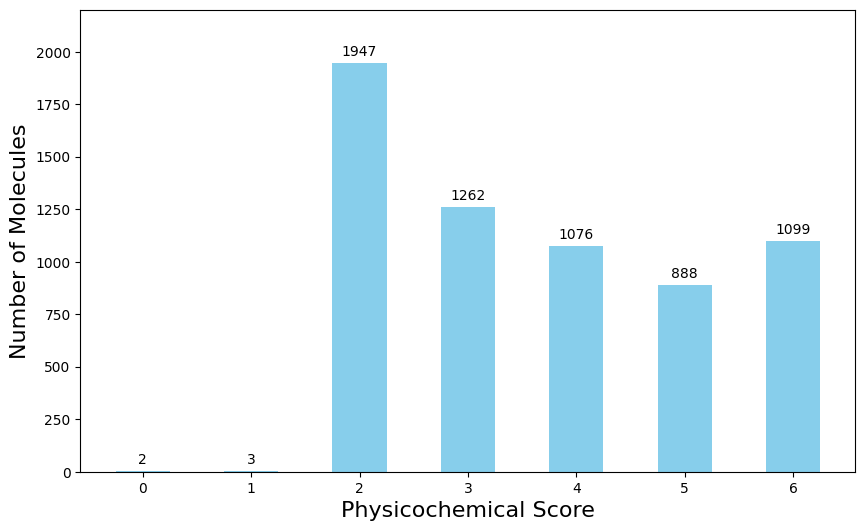

In [28]:
# Create a bar plot with values on top
plt.figure(figsize=(10, 6))
bars = plt.bar(scores, counts, color='skyblue',width=0.5)

# Add numbers on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 20,
             str(bar.get_height()), ha='center', va='bottom')

plt.ylim(0, 2200)

plt.xlabel('Physicochemical Score', fontsize=16)
plt.ylabel('Number of Molecules', fontsize=16)
# plt.title('Distribution of ADMET Scores')
plt.xticks(scores)  # Ensure all scores are labeled
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.savefig("plot/Physicochemical_score.pdf", format='pdf')
plt.show()


In [29]:
tmp_value_counts = df['sum_permibility_property_score'].value_counts()

# Data for ADMET scores and their counts
scores = tmp_value_counts.keys()

counts = tmp_value_counts.values

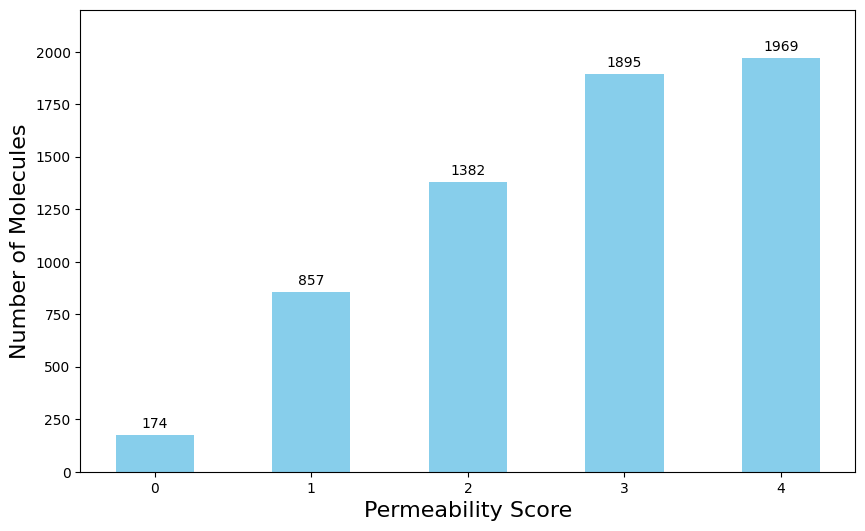

In [16]:
# Create a bar plot with values on top
plt.figure(figsize=(10, 6))
bars = plt.bar(scores, counts, color='skyblue',width=0.5)

# Add numbers on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 20,
             str(bar.get_height()), ha='center', va='bottom')

plt.ylim(0, 2200)

plt.xlabel('Permeability Score', fontsize=16)
plt.ylabel('Number of Molecules', fontsize=16)
# plt.title('Distribution of ADMET Scores')
plt.xticks(scores)  # Ensure all scores are labeled
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.savefig("plot/Permeability_score.pdf", format='pdf')
plt.show()


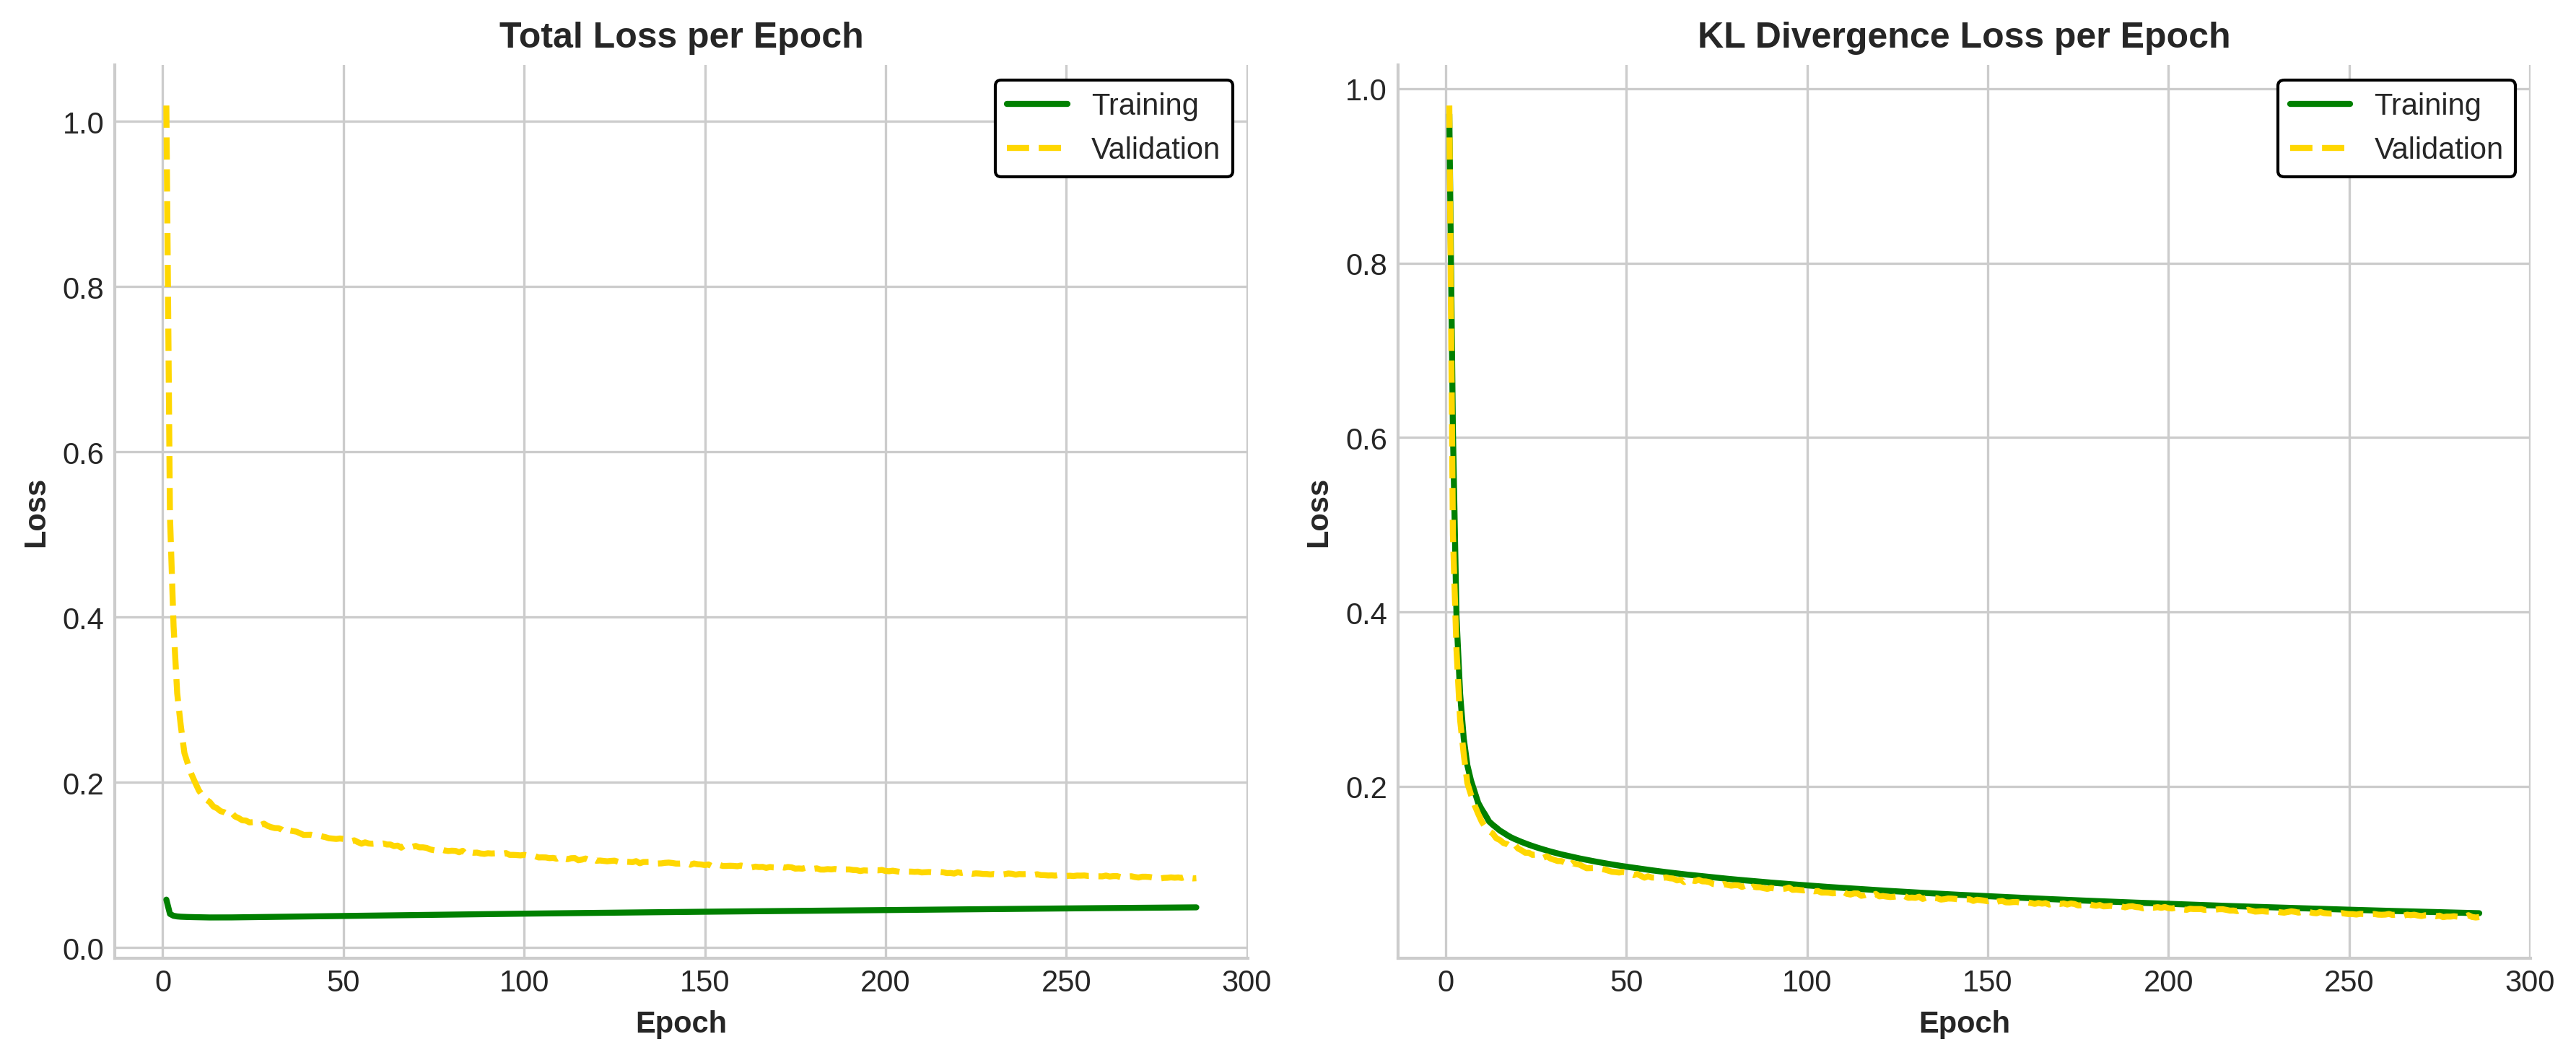

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# --- Data Loading ---
df = pd.read_csv('../model_checkpoints/Molecular_VAE_Representation/training_metrics.csv')

# If the first epoch is an outlier, uncomment below to drop it
# df = df[df['epoch'] != 1]

# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    "axes.titleweight": "bold",
    "axes.labelweight": "bold",
    "axes.spines.top": False,
    "axes.spines.right": False,
    "figure.dpi": 300,
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# --- Plot 1: Total Loss ---
ax1.plot(df['epoch'], df['train_loss'], label='Training', color='green', linewidth=2)
ax1.plot(df['epoch'], df['val_loss'], label='Validation', color='gold', linestyle='--', linewidth=2)
ax1.set_title('Total Loss per Epoch', fontsize=12)
ax1.set_xlabel('Epoch', fontsize=10)
ax1.set_ylabel('Loss', fontsize=10)
ax1.legend(frameon=True, edgecolor='black', framealpha=1)

# --- Plot 2: KL Divergence Loss ---
ax2.plot(df['epoch'], df['train_kl_loss'], label='Training', color='green', linewidth=2)
ax2.plot(df['epoch'], df['val_kl_loss'], label='Validation', color='gold', linestyle='--', linewidth=2)
ax2.set_title('KL Divergence Loss per Epoch', fontsize=12)
ax2.set_xlabel('Epoch', fontsize=10)
ax2.set_ylabel('Loss', fontsize=10)
ax2.legend(frameon=True, edgecolor='black', framealpha=1)

# --- Save and Display Figure ---
plt.tight_layout()
plot_path = 'plot/training_performance.svg'
os.makedirs(os.path.dirname(plot_path), exist_ok=True)
plt.savefig(plot_path, format='svg', dpi=300, bbox_inches='tight')
plt.show()
